# Introspect Composable Pipeline
----

<div class="alert alert-box alert-info">
Please use Jupyter labs http://&lt;board_ip_address&gt;/lab for this notebook.
</div>

This notebook shows your how to create your first custom pipeline

## Aims
* Use Composable object
* Start the HDMI path
* Compose pipeline
* Play with the pipeline

## Table of Contents
* [Download Composable Overlay](#download)
* [Start HDMI Video](#start_hdmi)
* [Let us Compose](#compose)
* [Visualize the Pipeline](#visualize)
* [Play with the LUT IP](#play)
* [Stop HDMI Video](#stop_hdmi)
* [Conclusion](#conclusion)

----

## Revision History

* v1.0 | 30 March 2021 | First notebook revision.
* v1.1 | 11 August 2021 | Update notebook to composable overlay API 1.0.0

----

## Download Composable Overlay <a class="anchor" id="download"></a>

Import the pynq video libraries as well as Composable class and the drivers for the IP.

Download the Composable Overlay using `pynq.Overlay` and grab a handler to the `composable` hierarchy

In [1]:
from pynq import Overlay
from pynq.lib.video import *
from pynq_composable import *

ol = Overlay("cv_dfx_4_pr.bit")

cpipe = ol.composable

## Start HDMI Video <a class="anchor" id="start_hdmi"></a>

Get `VideoStream` object and start video

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to connect HDMI cables to a valid video source and screen may cause the notebook to hang
</div>

In [2]:
video = VideoStream(ol)
video.start()

## Let us Compose <a class="anchor" id="compose"></a>

First we need to grab handlers to the IP objects to simplify the notebook

In [3]:
filter2d = cpipe.filter2d_accel
rgb2gray = cpipe.rgb2gray_accel
gray2rgb = cpipe.gray2rgb_accel
rgb2hsv = cpipe.rgb2hsv_accel
colorthr = cpipe.colorthresholding_accel
lut = cpipe.lut_accel

This method expect a list with the IP object, based on this list the pipeline will be configured on our FPGA. After you run the next cell the video stream on your monitor should change,

In [4]:
video_pipeline = [cpipe.hdmi_source_in, lut, rgb2hsv, rgb2gray, gray2rgb, cpipe.hdmi_source_out]

cpipe.compose(video_pipeline)

## Visualize the Pipeline <a class="anchor" id="visualize"></a>

We can visualize the implemented pipeline with the `.graph` attribute. This allows to quickly verify the pipeline

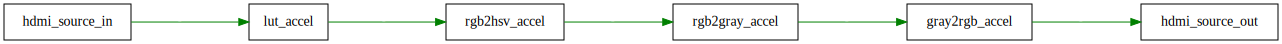

In [5]:
cpipe.graph

## Tapping <a class="anchor" id="tapping"></a>

The `Composable` class provides the `tap` method which is a handy way to grab the output of one of the stages on the pipeline and redirect it to the output of the pipeline. This allows introspection without recomposing a pipeline. `tap` accepts either and index on the pipeline or the IP object. To return to the original pipeline just call `.untap()`

<div class="alert alert-heading alert-warning">
Tapping is not supported on branches
</div>

In [6]:
cpipe.tap?

Signature: cpipe.tap(ip: Union[Type[pynq.overlay.DefaultIP], int] = None) -> None
Docstring:
Observe the output of an IP object in the current pipeline

Tap into the output of any of the IP cores in the current pipeline
Note that tap is not supported in a branch

You can tap by passing the IP name or the index of the IP in the list.

Note that tap does not modify the attribute current_pipeline

Parameters
----------
ip:
    Either an IP object in the current pipeline to be tapped or
    index of IP object in the current pipeline to be tapped

Examples:
    tap(cpipe.pr_1.dilate)
    tap(6)
File:      /usr/local/share/pynq-venv/lib/python3.8/site-packages/pynq_composable/composable.py
Type:      method


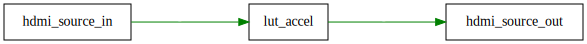

In [7]:
cpipe.tap(lut)

cpipe.graph

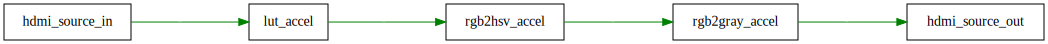

In [8]:
cpipe.tap(3)

cpipe.graph

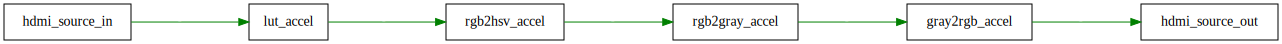

In [9]:
cpipe.untap()

cpipe.graph

## Stop HDMI Video <a class="anchor" id="stop_hdmi"></a>

Finally stop the HDMI video pipeline

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to stop the HDMI Video may hang the board 
when trying to download another bitstream onto the FPGA
</div>

In [10]:
video.stop()
ol.free()

----

## Conclusion <a class="anchor" id="conclusion"></a>

This notebook has shown how to compose a simple pipeline, how to visualize what has been implemented and how to interact with one of the IP objects on the pipeline

[⬅️ First Custom Pipeline](02_first_custom_pipeline.ipynb) | | [Modify Composable Pipeline ➡️](04_modify_pipeline.ipynb)

Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----